In [ ]:
from google.colab import drive
import os,sys
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/ph_detection')
sys.path.append('/content/gdrive/MyDrive/ph_detection')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix, classification_report,accuracy_score,r2_score, balanced_accuracy_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
df=pd.read_csv("ph-data.csv")
df.head(4)

,blue,green,red,label
0,36,27,231,0
1,36,84,250,1
2,37,164,255,2
3,22,205,255,3


In [ ]:
df.shape

(653, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   blue    653 non-null    int64
 1   green   653 non-null    int64
 2   red     653 non-null    int64
 3   label   653 non-null    int64
dtypes: int64(4)
memory usage: 20.5 KB


In [ ]:
df.isnull()

,blue,green,red,label
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
648,False,False,False,False
649,False,False,False,False
650,False,False,False,False
651,False,False,False,False


In [ ]:
df.isnull().sum()

,0
blue,0
green,0
red,0
label,0


In [ ]:
df.dtypes

,0
blue,int64
green,int64
red,int64
label,int64


In [ ]:
df.duplicated().sum()

np.int64(206)

In [ ]:
(df.mean()*100).round(1)

,0
blue,8929.1
green,13009.5
red,12065.5
label,705.5


In [ ]:
#df=df.drop_duplicates()


In [ ]:
(df.isnull().mean()*100).round(1)

,0
blue,0.0
green,0.0
red,0.0
label,0.0


In [ ]:
df.describe()

,blue,green,red,label
count,653.000000,653.000000,653.000000,653.000000
mean,89.290965,130.094946,120.655436,7.055130
std,74.974850,72.487085,89.581264,4.287951
min,0.000000,0.000000,0.000000,0.000000
25%,22.000000,68.000000,52.000000,3.000000
50%,67.000000,146.000000,90.000000,7.000000
75%,162.000000,189.000000,224.000000,11.000000
max,255.000000,255.000000,255.000000,14.000000


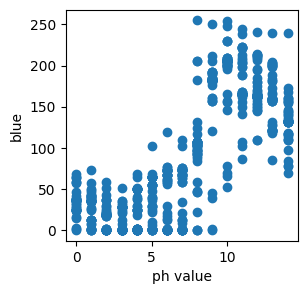

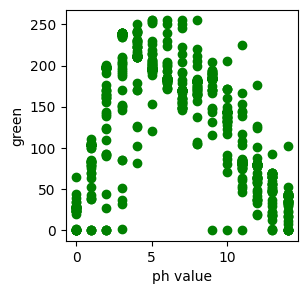

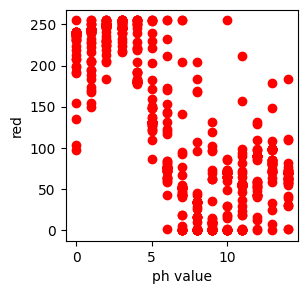

In [ ]:
plt.figure(figsize=(3,3))
plt.scatter(df['label'],df['blue'])
plt.xlabel('ph value')
plt.ylabel('blue')
plt.show()

plt.figure(figsize=(3,3))
plt.scatter(df['label'],df['green'],color='green')
plt.xlabel('ph value')
plt.ylabel('green')
plt.show()

plt.figure(figsize=(3,3))
plt.scatter(df['label'],df['red'],color='red')
plt.xlabel('ph value')
plt.ylabel('red')
plt.show()

<Axes: xlabel='label', ylabel='Count'>

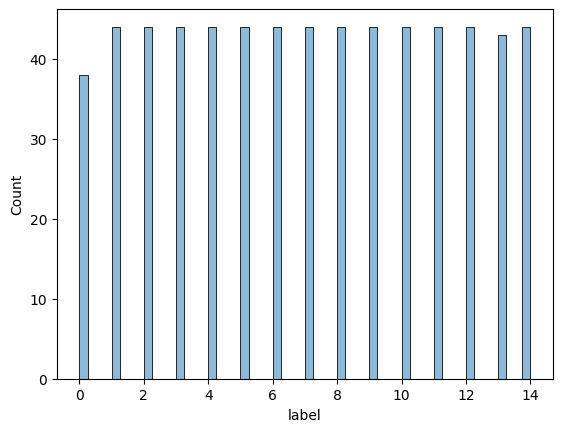

In [ ]:
sns.histplot(df['label'], bins=56, alpha=.5)

In [ ]:
colors = np.array([df.red, df.green, df.blue]).T

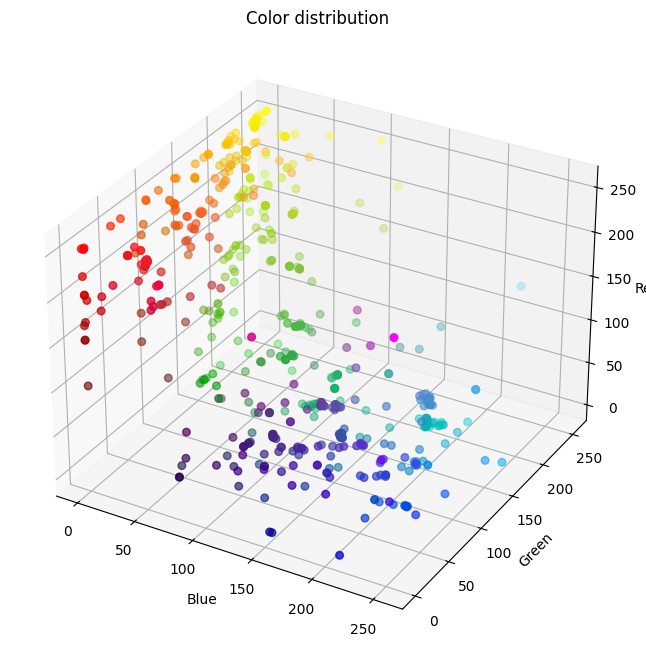

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
x = df.blue
y = df.green
z = df.red
ax.scatter(x, y, z, c=colors/255.0, s=30)
ax.set_title("Color distribution")
ax.set_xlabel("Blue")
ax.set_ylabel("Green")
ax.set_zlabel("Red")
plt.show()

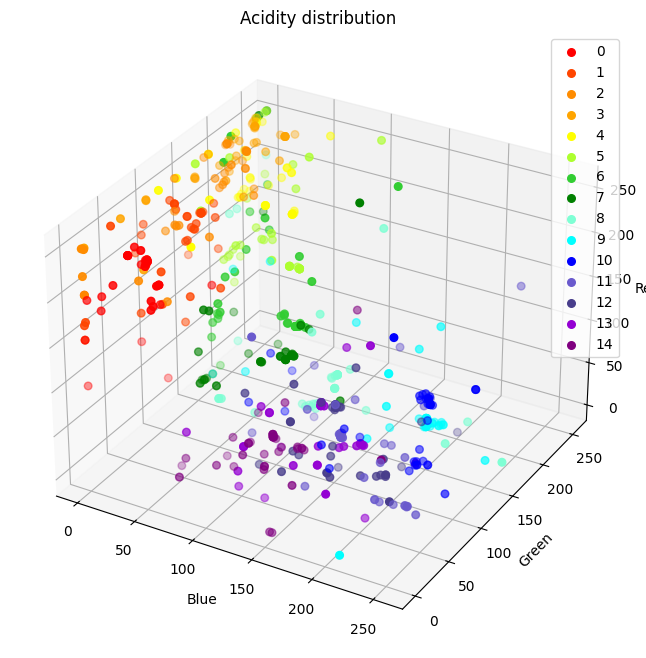

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
labels = range(0, 15)
ph_colors = ['red','orangered', 'darkorange', 'orange', 'yellow', 'greenyellow', 'limegreen', 'green', 'aquamarine', 'aqua', 'blue', 'slateblue', 'darkslateblue', 'darkviolet', 'purple']
for l in labels:
    x = df[df['label'] == l].blue
    y = df[df['label'] == l].green
    z = df[df['label'] == l].red
    ax.scatter(x, y, z, label=l, c=ph_colors[l], s=30)
ax.set_title("Acidity distribution")
ax.set_xlabel("Blue")
ax.set_ylabel("Green")
ax.set_zlabel("Red")
ax.legend(loc='best')
plt.show()

In [ ]:
def determine_acidity_3_group(df):
    if df['label'] == 7:
        val = 'neutral'
    elif df['label'] > 7:
        val = 'alkali'
    elif df['label'] < 7:
        val = 'acid'
    return val


def determine_acidity_5_group(df):
    if df['label'] == 7:
        val = 'neutral'
    elif df['label'] > 11:
        val = 'strong_alkali'
    elif df['label'] < 3:
        val = 'strong_acid'
    elif 11 >= df['label'] > 7:
        val = 'alkali'
    elif 3 <= df['label'] < 7:
        val = 'acid'
    return val

In [ ]:
df['acidity_3_group'] = df.apply(determine_acidity_3_group, axis=1)
df['acidity_5_group'] = df.apply(determine_acidity_5_group, axis=1)

In [ ]:
df.head()

,blue,green,red,label,acidity_3_group,acidity_5_group
0,36,27,231,0,acid,strong_acid
1,36,84,250,1,acid,strong_acid
2,37,164,255,2,acid,strong_acid
3,22,205,255,3,acid,acid
4,38,223,221,4,acid,acid


<ipython-input-70-55472e793634>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette=ph_colors,alpha=0.5)


<Axes: xlabel='label', ylabel='count'>

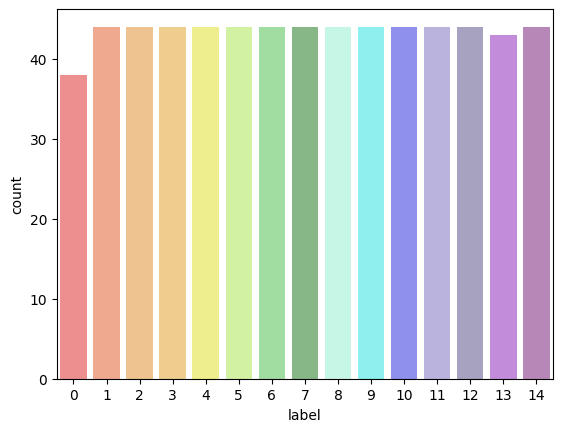

In [ ]:
sns.countplot(x='label', data=df, palette=ph_colors,alpha=0.5)

<ipython-input-71-45e158c6d2b0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='acidity_3_group', data=df, palette=['red','green','blue'],alpha=0.8)


<Axes: xlabel='acidity_3_group', ylabel='count'>

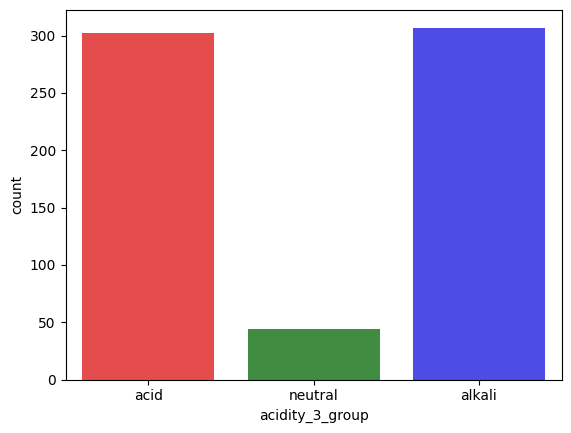

In [ ]:
sns.countplot(x='acidity_3_group', data=df, palette=['red','green','blue'],alpha=0.8)

<ipython-input-72-3669446eb754>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='acidity_5_group', data=df,palette=['red','orange','green','aqua','blue'],alpha=0.8)


<Axes: xlabel='acidity_5_group', ylabel='count'>

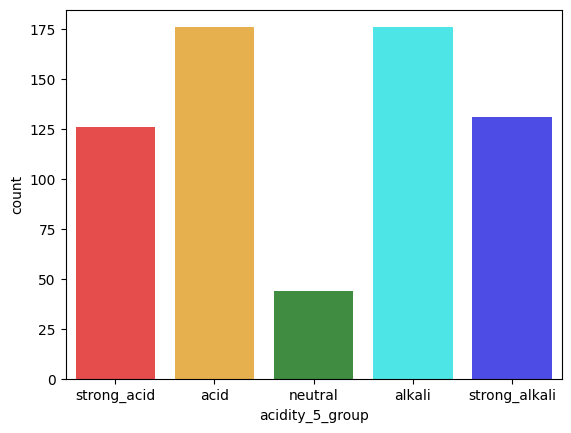

In [ ]:
sns.countplot(x='acidity_5_group', data=df,palette=['red','orange','green','aqua','blue'],alpha=0.8)

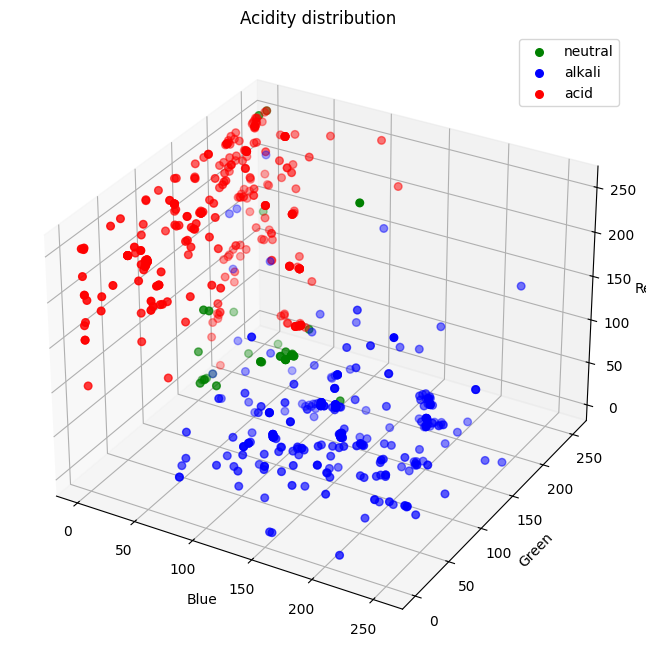

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
labels = ['neutral', 'alkali', 'acid']
ph_colors = ['green','blue', 'red']
for l in range(0, 3):
    x = df[df['acidity_3_group'] == labels[l]].blue
    y = df[df['acidity_3_group'] == labels[l]].green
    z = df[df['acidity_3_group'] == labels[l]].red
    ax.scatter(x, y, z, label=labels[l], c=ph_colors[l], s=30)
ax.set_title("Acidity distribution")
ax.set_xlabel("Blue")
ax.set_ylabel("Green")
ax.set_zlabel("Red")
ax.legend(loc='best')
plt.show()

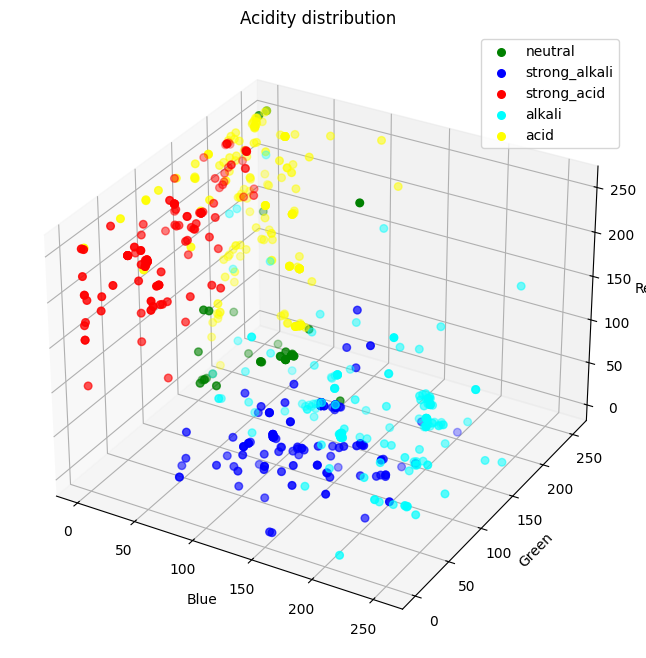

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
labels = ['neutral', 'strong_alkali', 'strong_acid', 'alkali', 'acid']
ph_colors = ['green','blue', 'red', 'aqua', 'yellow']
for l in range(0, 5):
    x = df[df['acidity_5_group'] == labels[l]].blue
    y = df[df['acidity_5_group'] == labels[l]].green
    z = df[df['acidity_5_group'] == labels[l]].red
    ax.scatter(x, y, z, label=labels[l], c=ph_colors[l], s=30)
ax.set_title("Acidity distribution")
ax.set_xlabel("Blue")
ax.set_ylabel("Green")
ax.set_zlabel("Red")
ax.legend(loc='best')
plt.show()

In [ ]:
df_result_2 = df['acidity_3_group']
df_result_3 = df['acidity_5_group']

target = df['label']
features = df.drop(['label', 'acidity_3_group', 'acidity_5_group'], axis=1)

In [ ]:
features.head(3)

,blue,green,red
0,36,27,231
1,36,84,250
2,37,164,255


In [ ]:
target.head(4)

,label
0,0
1,1
2,2
3,3


In [ ]:
X_train,X_test, y_train_1, y_test_1=train_test_split(features,target,test_size=0.25,random_state=40)

In [ ]:
X_train.head(4)

,blue,green,red
239,1,0,103
116,189,117,29
421,0,231,192
504,37,28,238


In [ ]:
y_train_1.head(3)

,label
239,0
116,11
421,4


In [ ]:
y_train_2=df['acidity_3_group'].iloc[y_train_1.index]
y_train_3=df['acidity_5_group'].iloc[y_train_1.index]
y_test_2=df['acidity_3_group'].iloc[y_test_1.index]
y_test_3=df['acidity_5_group'].iloc[y_test_1.index]

In [ ]:
y_train_2=df['acidity_3_group'].iloc[y_train_1.index]
y_train_2.head(4)

,acidity_3_group
239,acid
116,alkali
421,acid
504,acid


In [ ]:
y_train_1.dtypes

dtype('int64')

In [ ]:
y_train_3.dtypes

dtype('O')

In [ ]:
def best_model(X_train, y_train):

    param_distribution_log_reg = {'penalty':['l2', 'none'], 'fit_intercept':[True,False], 'solver':['newton-cg', 'lbfgs', 'sag', 'saga']}
    param_distribution_KNN = {'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
    param_distribution_rand_forests = {'n_estimators': range(5, 20),  'max_depth': range(3, 30)}
    param_distribution_grad_boosting = {'n_estimators': range(5, 20),  'max_depth': range(3, 30)}

    if y_train.dtypes == 'int64':

        model_log_regression = GridSearchCV(LogisticRegression(), param_distribution_log_reg, scoring='balanced_accuracy', n_jobs=-1)
        model_KNN = GridSearchCV(KNeighborsClassifier(), param_distribution_KNN, scoring='balanced_accuracy', n_jobs=-1)
        model_rand_forests = RandomizedSearchCV(RandomForestClassifier(), param_distribution_rand_forests, n_iter=60, scoring='balanced_accuracy', n_jobs=-1, random_state=1)
        model_grad_boosting = RandomizedSearchCV(GradientBoostingClassifier(), param_distribution_grad_boosting, n_iter=60, scoring='balanced_accuracy', n_jobs=-1, random_state=1)

        model_log_regression.fit(X_train, y_train)
        model_KNN.fit(X_train, y_train)
        model_rand_forests.fit(X_train, y_train)
        model_grad_boosting.fit(X_train, y_train)

        result = pd.DataFrame({'Score': [model_log_regression.best_score_, model_KNN.best_score_, model_rand_forests.best_score_, model_grad_boosting.best_score_],
                               'Parameters': [model_log_regression.best_params_, model_KNN.best_params_, model_rand_forests.best_params_, model_grad_boosting.best_params_]},
                              index=['LogisticRegression', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier'])

    elif y_train.dtypes == 'object':

        model_log_regression = GridSearchCV(LogisticRegression(), param_distribution_log_reg, scoring='balanced_accuracy', n_jobs=-1)
        model_KNN = GridSearchCV(KNeighborsClassifier(), param_distribution_KNN, scoring='balanced_accuracy', n_jobs=-1)
        model_rand_forests = GridSearchCV(RandomForestClassifier(), param_distribution_rand_forests, scoring='balanced_accuracy', n_jobs=-1)
        model_grad_boosting = GridSearchCV(GradientBoostingClassifier(), param_distribution_grad_boosting, scoring='balanced_accuracy', n_jobs=-1)

        model_log_regression.fit(X_train, y_train)
        model_KNN.fit(X_train, y_train)
        model_rand_forests.fit(X_train, y_train)
        model_grad_boosting.fit(X_train, y_train)

        result = pd.DataFrame({'Score': [model_log_regression.best_score_, model_KNN.best_score_, model_rand_forests.best_score_, model_grad_boosting.best_score_],
                               'Parameters': [model_log_regression.best_params_, model_KNN.best_params_, model_rand_forests.best_params_, model_grad_boosting.best_params_]},
                              index=['LogisticRegression', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier'])

    return result

In [ ]:
best_model(X_train, y_train_1)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
31 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

,Score,Parameters
LogisticRegression,0.609175,"{'fit_intercept': True, 'penalty': 'l2', 'solv..."
KNeighborsClassifier,0.706286,{'algorithm': 'auto'}
RandomForestClassifier,0.760952,"{'n_estimators': 16, 'max_depth': 15}"
GradientBoostingClassifier,0.713651,"{'n_estimators': 19, 'max_depth': 4}"


In [ ]:
best_model(X_train, y_train_2)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

,Score,Parameters
LogisticRegression,0.771157,"{'fit_intercept': True, 'penalty': 'l2', 'solv..."
KNeighborsClassifier,0.896279,{'algorithm': 'auto'}
RandomForestClassifier,0.924755,"{'max_depth': 14, 'n_estimators': 10}"
GradientBoostingClassifier,0.905707,"{'max_depth': 3, 'n_estimators': 5}"


In [ ]:
best_model(X_train,y_train_3)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

,Score,Parameters
LogisticRegression,0.776809,"{'fit_intercept': True, 'penalty': 'l2', 'solv..."
KNeighborsClassifier,0.876571,{'algorithm': 'auto'}
RandomForestClassifier,0.908455,"{'max_depth': 16, 'n_estimators': 19}"
GradientBoostingClassifier,0.872898,"{'max_depth': 4, 'n_estimators': 13}"


In [ ]:
best_model1 = RandomForestClassifier(n_estimators=16, max_depth=22)
best_model2 = RandomForestClassifier(n_estimators=9, max_depth=22)
best_model3 = RandomForestClassifier(n_estimators=13, max_depth=8)

In [ ]:
best_model1.fit(X_train,y_train_1)
best_model2.fit(X_train,y_train_2)
best_model3.fit(X_train,y_train_3)

RandomForestClassifier(max_depth=8, n_estimators=13)

In [ ]:
y_pred1=best_model1.predict(X_test)
y_pred2=best_model2.predict(X_test)
y_pred3=best_model3.predict(X_test)

In [ ]:
print(classification_report(y_test_1, y_pred1))
print(classification_report(y_test_2, y_pred2, target_names=df.acidity_3_group.unique()))
print(classification_report(y_test_3, y_pred3, target_names=df.acidity_5_group.unique()))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.73      0.67      0.70        12
           2       0.65      0.81      0.72        16
           3       0.80      0.62      0.70        13
           4       0.64      0.88      0.74         8
           5       0.42      0.62      0.50         8
           6       0.62      0.53      0.57        15
           7       0.56      0.62      0.59         8
           8       1.00      0.67      0.80         9
           9       1.00      0.92      0.96        13
          10       0.73      0.73      0.73        11
          11       0.62      0.62      0.62         8
          12       0.75      0.82      0.78        11
          13       1.00      0.67      0.80        15
          14       0.69      0.90      0.78        10

    accuracy                           0.72       164
   macro avg       0.74      0.72      0.72       164
weighted avg       0.75   

In [ ]:
def roc_auc_score_summary(model, X_test, y_test):
    y_preb_probs = model.predict_proba(X_test)
    roc_auc_score_for_model = round(roc_auc_score(y_test, y_preb_probs, average="weighted", multi_class="ovr"), 3)
    count_of_classes = len(y_test.unique())
    print('ROC_AUC_score of model with', count_of_classes, 'classes =', roc_auc_score_for_model)
    return

In [ ]:
roc_auc_score_summary(best_model1, X_test, y_test_1)
roc_auc_score_summary(best_model2, X_test, y_test_2)
roc_auc_score_summary(best_model3, X_test, y_test_3)

ROC_AUC_score of model with 15 classes = 0.945
ROC_AUC_score of model with 3 classes = 0.991
ROC_AUC_score of model with 5 classes = 0.981
